# Fig7

Below are the modeling results shown in Fig 7 of the paper

In [6]:
# plot modeling results as shown in the paper

#import HwlData as hw
import numpy as np
import matplotlib.pyplot as plt
import HNeuron as hn
import pickle
import glob

plt.style.use('./paper.mplstyle')

def plt_simdata(t, data, plt_type='vm', threshold=-40):
    """ plot simulated data in one big figure
    inputs:
        t::1-D array
            time axis for the data
        data::3-D array
            vmarray or others
        plt_type::string
            'vm' (default): plot vm
        threshold::double
            threshold for detecting spikes
            default: -40
    returns:
        fig::figure
        axs::axes
            
    """
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(3.2, 1.2), gridspec_kw=dict(hspace=0, wspace=0))

    # trial numbers to plot
    itry = np.random.choice(100, 100, replace=False)
    pspike = np.empty(9)
    for ic, c in enumerate(np.arange(-1, 1.25, 0.25)):
        if c <= 0:
            irow = 0
            icol = ic
        else:
            irow = 1
            icol = 8 - ic
        ax = axs[irow, icol]
        pspike[ic] = hn.plt_simu_new(ax, t, data, ic, itry, plt_type=plt_type, threshold=threshold)
        ax.set_title('C = %0.2f' % c, fontsize=6, va='top')

    # link nonzero C axes with C = 0 
    ylim = [-70, -10]
    axs[0, -1].set_xlim([100, 120])
    axs[0, -1].set_xticks([100, 110, 120])
    axs[0, -1].set_xticklabels(np.arange(0, 25, 10))
    axs[0, -1].set_ylim(ylim)
    axs[0, -1].spines['left'].set_visible(False)
    axs[0, -1].set_yticks([])
    for a in axs[:, :4].flat:
        a.set_xlim([100, 120])
        a.set_xticks([100, 110, 120])
        a.set_xticklabels(np.arange(0, 25, 10))

    for a in axs[:, 1:4].flat:
        a.spines['left'].set_visible(False)
        a.set_yticks([])

    for a in axs[:, :4].flat:
        a.set_ylim(ylim)
    #     a.axis('off')
    #     a.axis('off')

    for a in axs[0, :4].flat:
        a.set_xticklabels([])
    #     a.spines['bottom'].set_visible(False)

    # set last axis off
    # axs[-1, -1].axis('off')
    # plot spike probability in axs[-1, -1]
    axs[-1, -1].plot(np.arange(-1, 1.25, 0.25), pspike, '-o', markersize=2)
    axs[-1, -1].set_ylim([-0.2, 1.2])
    # axs[-1, -1].set_ylabel('Spike Prob')
    
    return fig, axs

## Fig 7A

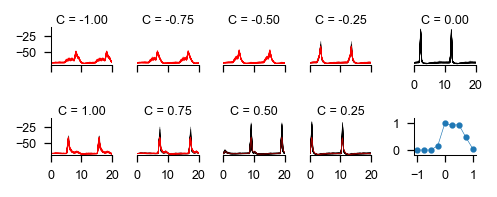

In [3]:
# major at 25kHz
fname = './data/model/main25khz.pkl'
with open(fname, 'rb') as f:
    (datasets, t, vmarray, syn_iarray, syn_garray, spkt_array) = pickle.load(f)
fig, axs = plt_simdata(t, vmarray, plt_type='vm')

## Fig 7B

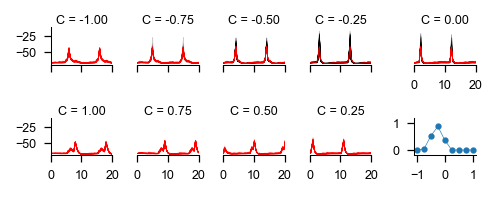

In [4]:
# major at 16kHz
fname = './data/model/main16khz.pkl'
with open(fname, 'rb') as f:
    (datasets, t, vmarray, syn_iarray, syn_garray, spkt_array) = pickle.load(f)
fig, axs = plt_simdata(t, vmarray, plt_type='vm')

## Fig 7C

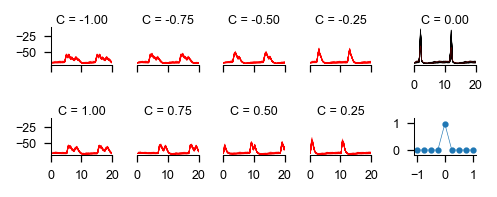

In [5]:
# equal weight
# load data
fname = './data/model/equalweight.pkl'
with open(fname, 'rb') as f:
    (datasets, t, vmarray, syn_iarray, syn_garray, spkt_array) = pickle.load(f)
fig, axs = plt_simdata(t, vmarray, plt_type='vm')